# Vilnius traffic

In [ ]:
'''
This simple analysis contains comparison of two public transport routes - WAY1 and WAY2 - going from home to office.
I take these two routes and do the following:
- List intersections, relevant for each route;
- List hours that I would like to evaluate traffic on - between 7 and 10 o'clock;
- Clean datasets for merging;
- Remove weekend information from the dataset;
- Aggregate data for each of the routes by hour. That is, I take the averages of the two measures vol_proc and spd_proc.
- I use the results to plot a few histograms to see which hour for which route is best using each measure.
'''

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Intersections passed with first option bus
WAY_TO_WORK_1 = ['110', '111', '112', '113', '106', '107', '108', '109', '702']

# Intersections passed with second option bus
WAY_TO_WORK_2 = ['111', '112', '113', '106', '107', '108', '109', '104', '101', '203']

GO_TO_WORK_HOURS = [7, 8, 9, 10]

In [39]:
def import_datasets():
    traffic = pd.read_csv('traffic_intensity.csv', sep=';')
    intersections = pd.read_excel('sankryzu_koordinates.xlsx')
    return traffic, intersections


def clean_intersections_data():
    data = import_datasets()[1]
    data['intersection_code'] = data['Node'].str[1:5] # Extract intersection code (i.e. 1001) into separate column
    data['intersection_code'] = data['intersection_code'].str.strip() # strip values to remove blank characters
    print('Intersections data shape:', data.shape)
    return data


def clean_traffic_data():    
    traffic = import_datasets()[0]
    traffic['intersection_code'] = traffic['Name'].str[6:10]
    traffic['intersection_code'] = traffic['intersection_code'].str.replace('_', '') # strip values to remove '_'characters 
    
    traffic['Time'] = pd.to_datetime(traffic['Time']) # Convert time from string to datetime
    traffic['weekday'] = traffic['Time'].dt.dayofweek
    traffic = traffic.loc[traffic['weekday'] < 6] # Keep only datapoints for weekdays, drop weekends
    
    traffic['hour'] = traffic['Time'].dt.hour
    traffic = traffic.loc[traffic['hour'].isin(GO_TO_WORK_HOURS)] # evaluating only hours between 7 and 10 in the morning
    print('traffic data shape:', traffic.shape)
    return traffic


def merge_datasets():    
    df1 = clean_intersections_data()
    df2 = clean_traffic_data()
    
    merged_df = pd.merge(df1, df2, on='intersection_code', how='right')
    print('NaN rows after merging:', len(merged_df[pd.isnull(merged_df['Name'])])) # number of NaN values after merging
    print('merged data shape:', merged_df.shape)
    return merged_df


def keep_relevant_intersections():   
    df_merged = merge_datasets()
   
    way_1 = df_merged.loc[df_merged['intersection_code'].isin(WAY_TO_WORK_1)]
    way_1 = way_1.reset_index(drop=True)
    
    way_2 = df_merged.loc[df_merged['intersection_code'].isin(WAY_TO_WORK_2)]
    way_2 = way_2.reset_index(drop=True)
    return way_1, way_2

def aggregate_results():
    way_1, way_2 = keep_relevant_intersections()
    way_1_results = way_1.groupby(['intersection_code', 'hour'])[['vol_proc', 'spd_proc']].mean()
    way_2_results = way_2.groupby(['intersection_code', 'hour'])[['vol_proc', 'spd_proc']].mean()
    return way_1_results, way_2_results

In [40]:
way_1_results, way_2_results = aggregate_results()

Intersections data shape: (245, 4)
traffic data shape: (103004, 11)
NaN rows after merging: 0
merged data shape: (103004, 14)


In [41]:
way_1_results = way_1.groupby(['hour'])[['vol_proc', 'spd_proc']].mean()
way_1_results

,vol_proc,spd_proc
hour,,
7,63.748050,28.228166
8,172.572889,25.181999
9,202.320929,23.987509
10,208.910839,23.844791


In [42]:
way_2_results = way_2.groupby(['hour'])[['vol_proc', 'spd_proc']].mean()
way_2_results

,vol_proc,spd_proc
hour,,
7,73.417534,28.143963
8,193.177733,24.567397
9,220.045962,23.432684
10,222.624393,23.306025


<BarContainer object of 4 artists>

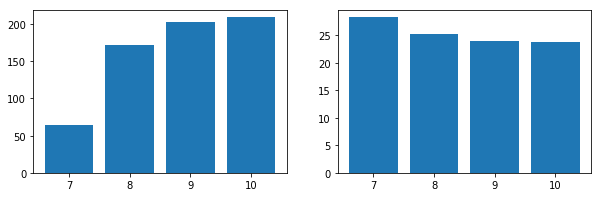

In [43]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].bar(way_1_results.index, way_1_results['vol_proc'])
ax[1].bar(way_1_results.index, way_1_results['spd_proc'])

<BarContainer object of 4 artists>

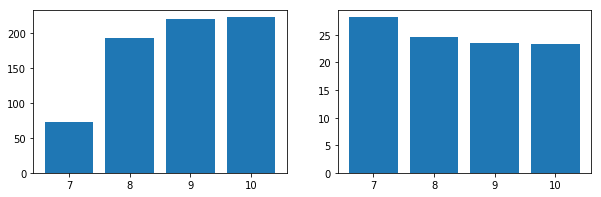

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(10,3))
ax[0].bar(way_2_results.index, way_2_results['vol_proc'])
ax[1].bar(way_2_results.index, way_2_results['spd_proc'])